In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.utils import to_categorical
from keras.optimizers import SGD #Stochastic Gradient Descent
from keras.utils import plot_model

import pickle

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# prepare gray scale data
data_gray_file = open('./archiv/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archiv/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)

In [3]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = to_categorical(data_color['y_train'], num_classes=43)
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [4]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


Epoch 1/120
435/435 [==============================] - 5s 8ms/step - loss: 0.1183 - accuracy: 0.2511 - val_loss: 0.0827 - val_accuracy: 0.4519
Epoch 2/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0696 - accuracy: 0.6139 - val_loss: 0.0587 - val_accuracy: 0.6418
Epoch 3/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0508 - accuracy: 0.7525 - val_loss: 0.0466 - val_accuracy: 0.7165
Epoch 4/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0410 - accuracy: 0.8109 - val_loss: 0.0404 - val_accuracy: 0.7738
Epoch 5/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0354 - accuracy: 0.8395 - val_loss: 0.0360 - val_accuracy: 0.7949
Epoch 6/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0316 - accuracy: 0.8573 - val_loss: 0.0334 - val_accuracy: 0.8149
Epoch 7/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0289 - accuracy: 0.8698 - val_loss: 0.0316 - val_accuracy: 0.8266

Epoch 58/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0094 - accuracy: 0.9607 - val_loss: 0.0289 - val_accuracy: 0.8752
Epoch 59/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0094 - accuracy: 0.9613 - val_loss: 0.0298 - val_accuracy: 0.8703
Epoch 60/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0093 - accuracy: 0.9615 - val_loss: 0.0295 - val_accuracy: 0.8772
Epoch 61/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0093 - accuracy: 0.9622 - val_loss: 0.0292 - val_accuracy: 0.8753
Epoch 62/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0091 - accuracy: 0.9625 - val_loss: 0.0295 - val_accuracy: 0.8750
Epoch 63/120
435/435 [==============================] - 3s 6ms/step - loss: 0.0091 - accuracy: 0.9630 - val_loss: 0.0296 - val_accuracy: 0.8781
Epoch 64/120
435/435 [==============================] - 3s 6ms/step - loss: 0.0090 - accuracy: 0.9630 - val_loss: 0.0287 - val_accuracy:

Epoch 115/120
435/435 [==============================] - 3s 6ms/step - loss: 0.0067 - accuracy: 0.9744 - val_loss: 0.0343 - val_accuracy: 0.8770
Epoch 116/120
435/435 [==============================] - 3s 6ms/step - loss: 0.0067 - accuracy: 0.9750 - val_loss: 0.0350 - val_accuracy: 0.8785
Epoch 117/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0066 - accuracy: 0.9752 - val_loss: 0.0350 - val_accuracy: 0.8775
Epoch 118/120
435/435 [==============================] - 3s 6ms/step - loss: 0.0067 - accuracy: 0.9750 - val_loss: 0.0345 - val_accuracy: 0.8797
Epoch 119/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0065 - accuracy: 0.9752 - val_loss: 0.0342 - val_accuracy: 0.8770
Epoch 120/120
435/435 [==============================] - 3s 7ms/step - loss: 0.0065 - accuracy: 0.9756 - val_loss: 0.0347 - val_accuracy: 0.8789


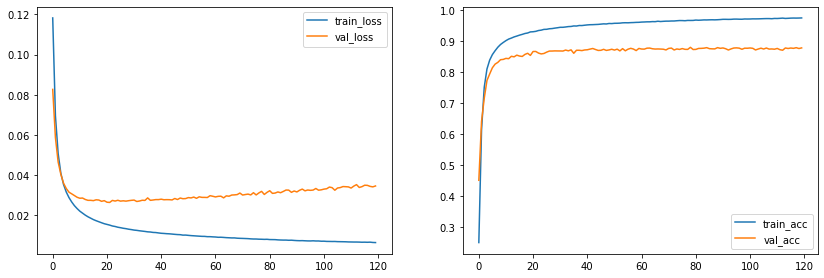

In [5]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=200, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])